### Import Necessary Libraries

In [87]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

##### Merging 12 Months of Sales Data Into Single File

In [26]:
df = pd.read_csv("Sales_April_2019.csv")
files = [file for file in os.listdir() if file.startswith("Sales")]

all_months_data  = pd.DataFrame()

for file in files:
    df = pd.read_csv(""+file)
    all_months_data = pd.concat([all_months_data,df])
all_months_data.to_csv("all_data.csv",index = False)


#### Read in Updated Dataframe

In [27]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


#### Clean up the data!

In [29]:
nan_df = all_data[all_data.isna().any(axis = 1)]
nan_df.head()

all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


#### Find 'Or' and Delete it!

In [34]:
all_data = all_data[all_data['Order Date'].str[0:2] != "Or"]

#### Convert columns to the correct type

In [36]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])#Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #Make float

#### Augment Data with additional columns

#### Add Month Column

In [37]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3


#### Add a sales column

In [39]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99


#### Add a City Column

In [56]:
# use .apply()
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin (TX)
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin (TX)
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin (TX)
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco (CA)
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco (CA)


#### Task 1 : What was the best month for sales? How much was earned that month? 

In [44]:
results = all_data.groupby('Month').sum()

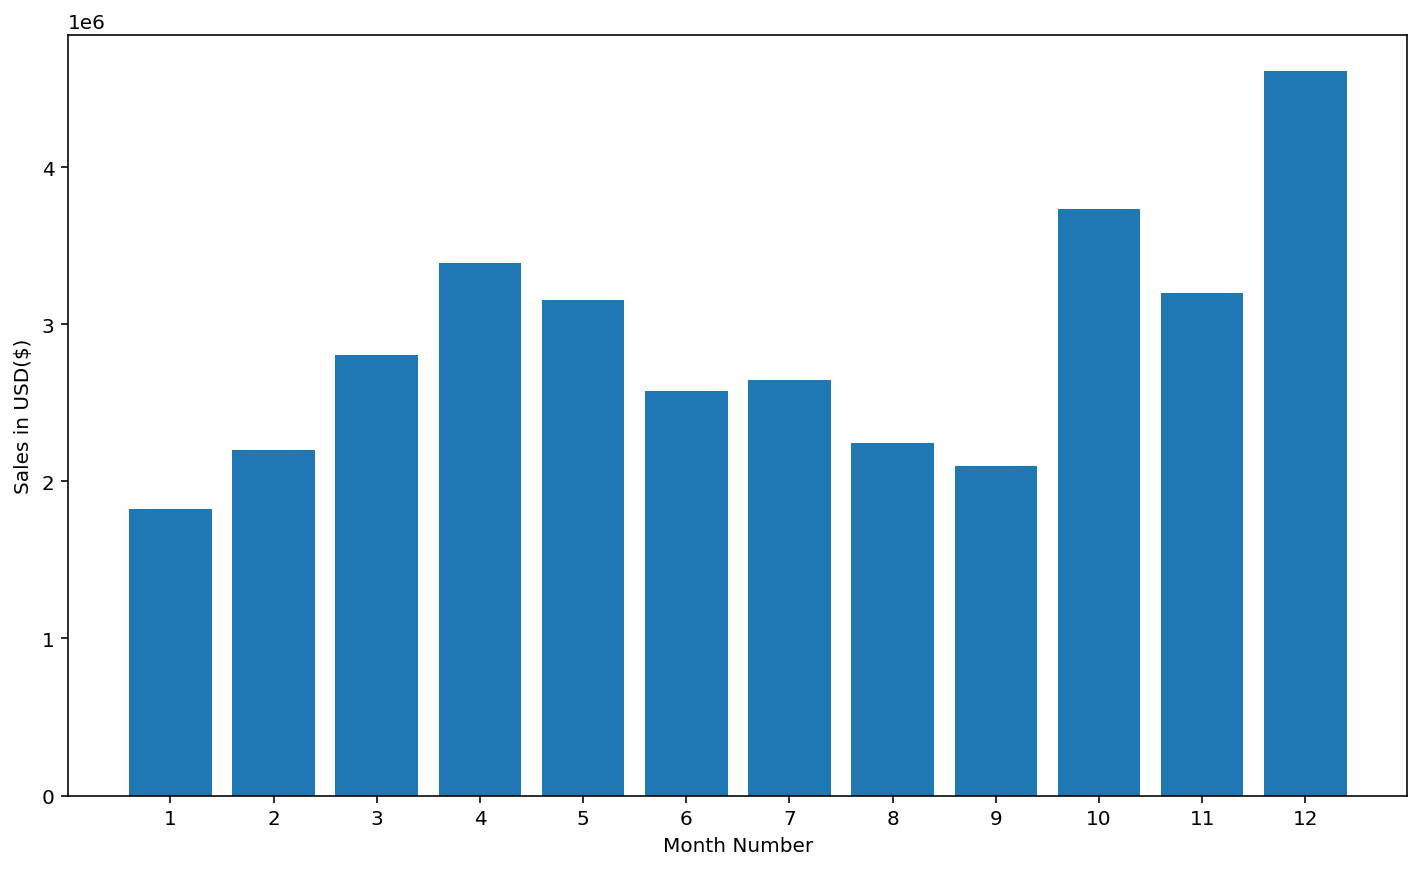

In [48]:
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month Number')
plt.show()

#### Task 2 : What city has the highest number of sales?

In [58]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


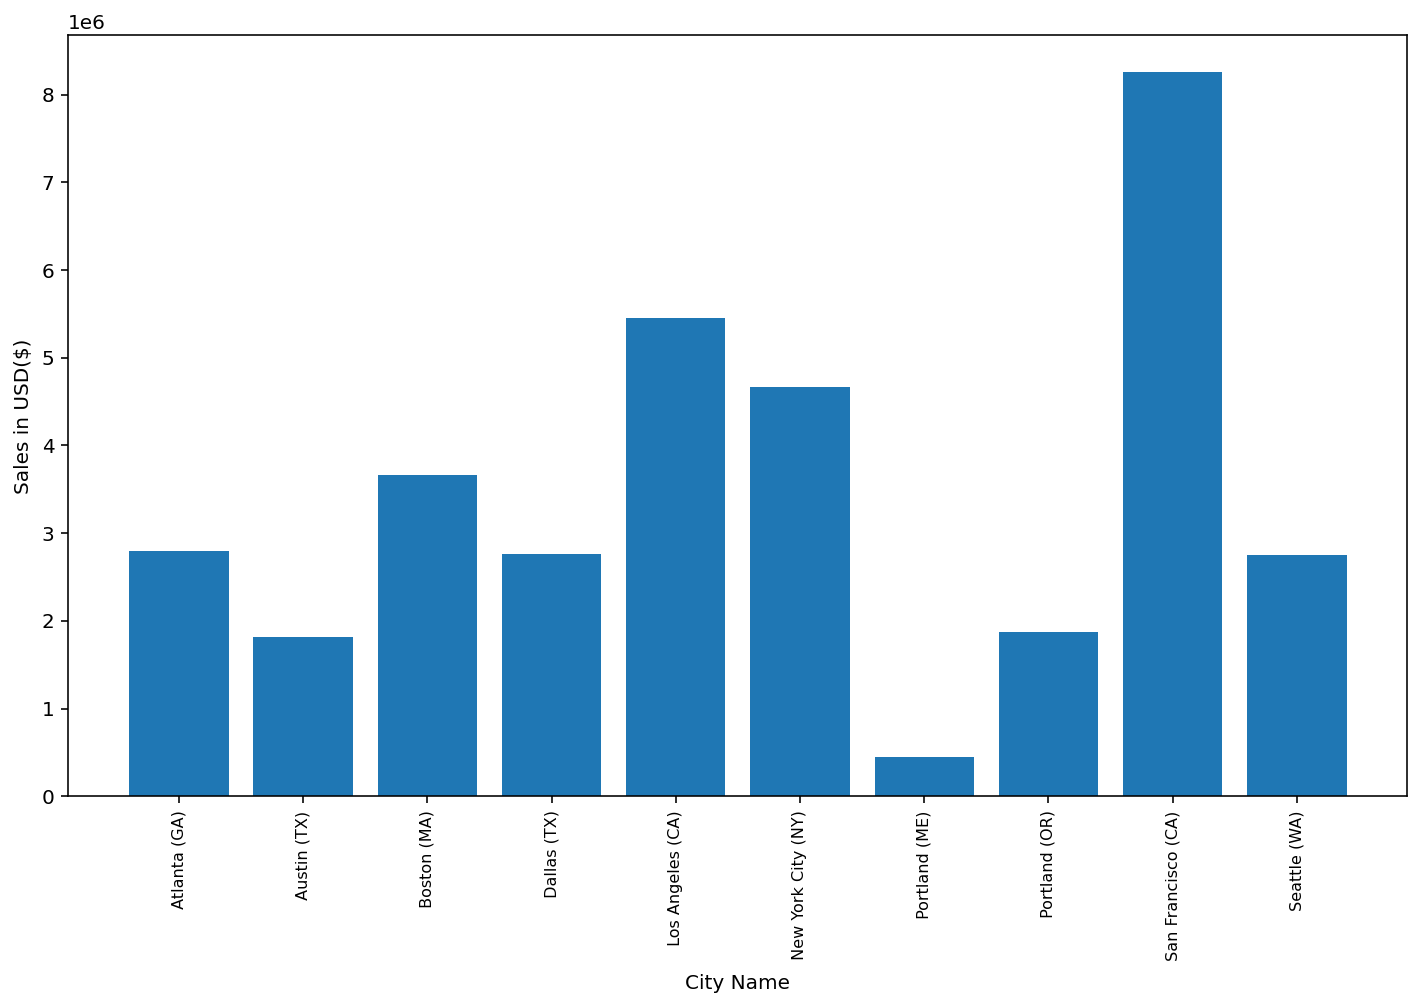

In [60]:
cities = [city for city,df in all_data.groupby('City')]

plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation = 'vertical',size = 8)
plt.ylabel('Sales in USD($)')
plt.xlabel('City Name')
plt.show()

#### Task 3 : What time should we display advertisements to maximize likelihood of customer's buying product?

In [62]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [68]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin (TX),20,59
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin (TX),20,59
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin (TX),20,59
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco (CA),5,39
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco (CA),0,1


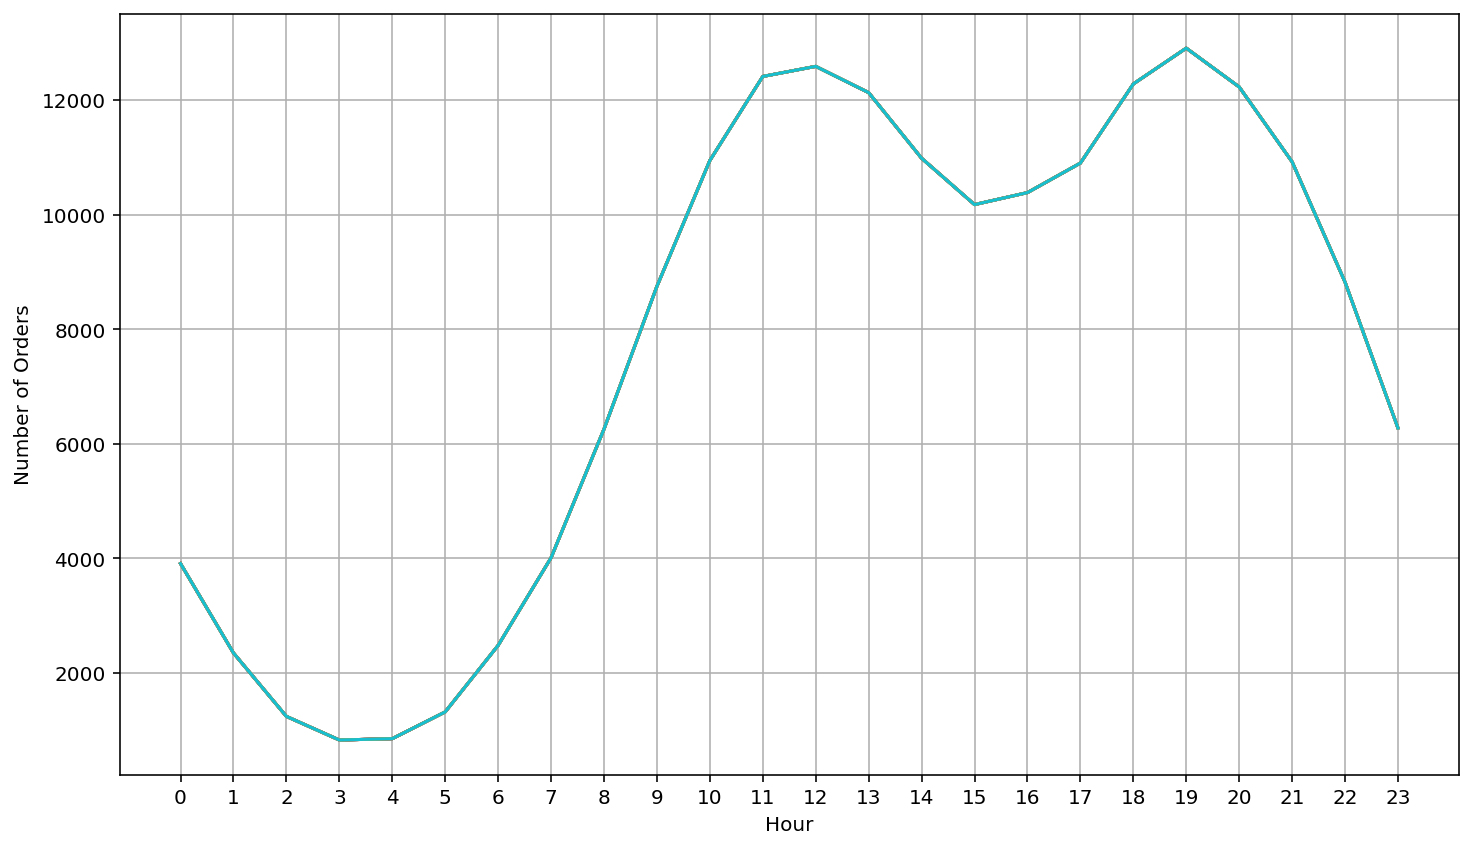

In [72]:
hours = [hour for hour,df in all_data.groupby('Hour')]

plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

###### 11 a.m and 7 p.m are the peak times people make orders. So, we can display advertisements at around 11 a.m or around 6.pm

### Task 4 : What products are most often sold together ? 

In [73]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin (TX),20,59
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin (TX),20,59
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin (TX),20,59
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco (CA),5,39
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco (CA),0,1


In [74]:
##Duplicated order ID's

df = all_data[all_data['Order ID'].duplicated(keep = False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin (TX),20,59
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin (TX),20,59
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin (TX),20,59
30,162037,iPhone,1,700.00,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",3,700.00,Los Angeles (CA),2,11
31,162037,Lightning Charging Cable,1,14.95,2019-03-23 02:11:00,"277 Elm St, Los Angeles, CA 90001",3,14.95,Los Angeles (CA),2,11
60,162066,AA Batteries (4-pack),1,3.84,2019-03-13 13:57:00,"602 Pine St, New York City, NY 10001",3,3.84,New York City (NY),13,57
61,162066,USB-C Charging Cable,2,11.95,2019-03-13 13:57:00,"602 Pine St, New York City, NY 10001",3,23.90,New York City (NY),13,57
66,162071,Vareebadd Phone,1,400.00,2019-03-30 20:23:00,"334 Jackson St, Atlanta, GA 30301",3,400.00,Atlanta (GA),20,23
67,162071,USB-C Charging Cable,1,11.95,2019-03-30 20:23:00,"334 Jackson St, Atlanta, GA 30301",3,11.95,Atlanta (GA),20,23
78,162082,Vareebadd Phone,1,400.00,2019-03-09 14:15:00,"401 Wilson St, New York City, NY 10001",3,400.00,New York City (NY),14,15


In [86]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Order ID,Grouped
0,162009,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,"iPhone,Lightning Charging Cable"
60,162066,"AA Batteries (4-pack),USB-C Charging Cable"
66,162071,"Vareebadd Phone,USB-C Charging Cable"
78,162082,"Vareebadd Phone,Wired Headphones"


In [92]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Task 5:  What product sold the most? why do you think it is sold the most?

In [93]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,700.00,Austin (TX),20,59
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,14.95,Austin (TX),20,59
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",3,23.98,Austin (TX),20,59
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco (CA),5,39
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco (CA),0,1


In [94]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


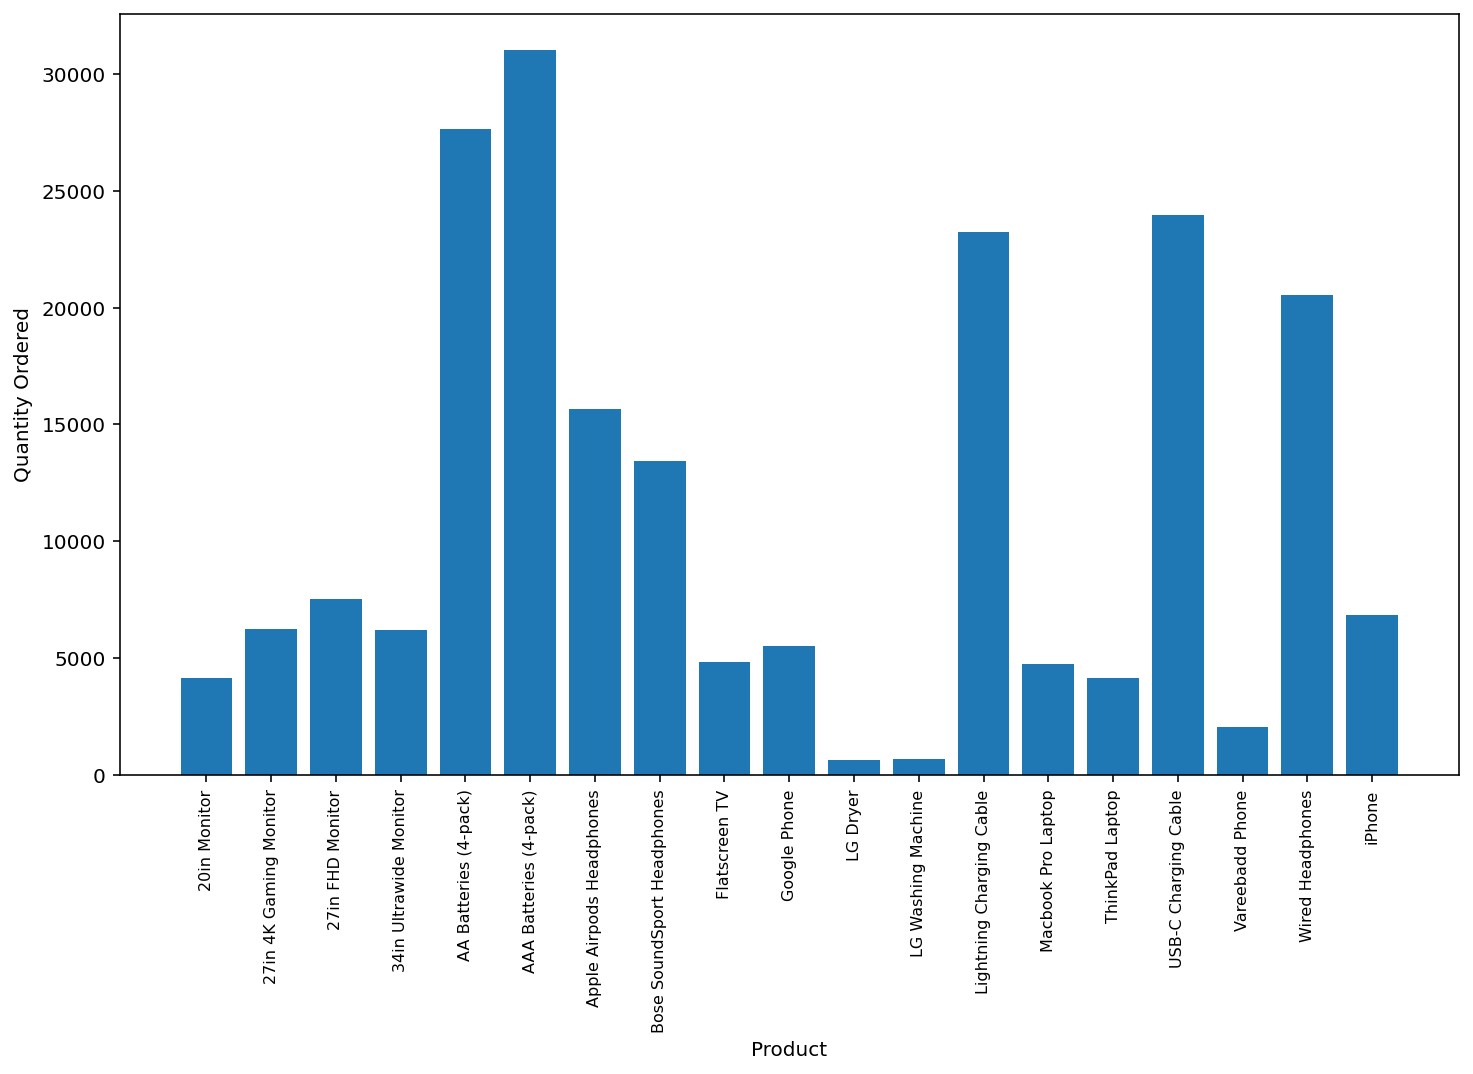

In [98]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product,df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products,rotation = 'vertical',size = 8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

In [101]:
prices = all_data.groupby('Product').mean()['Price Each']

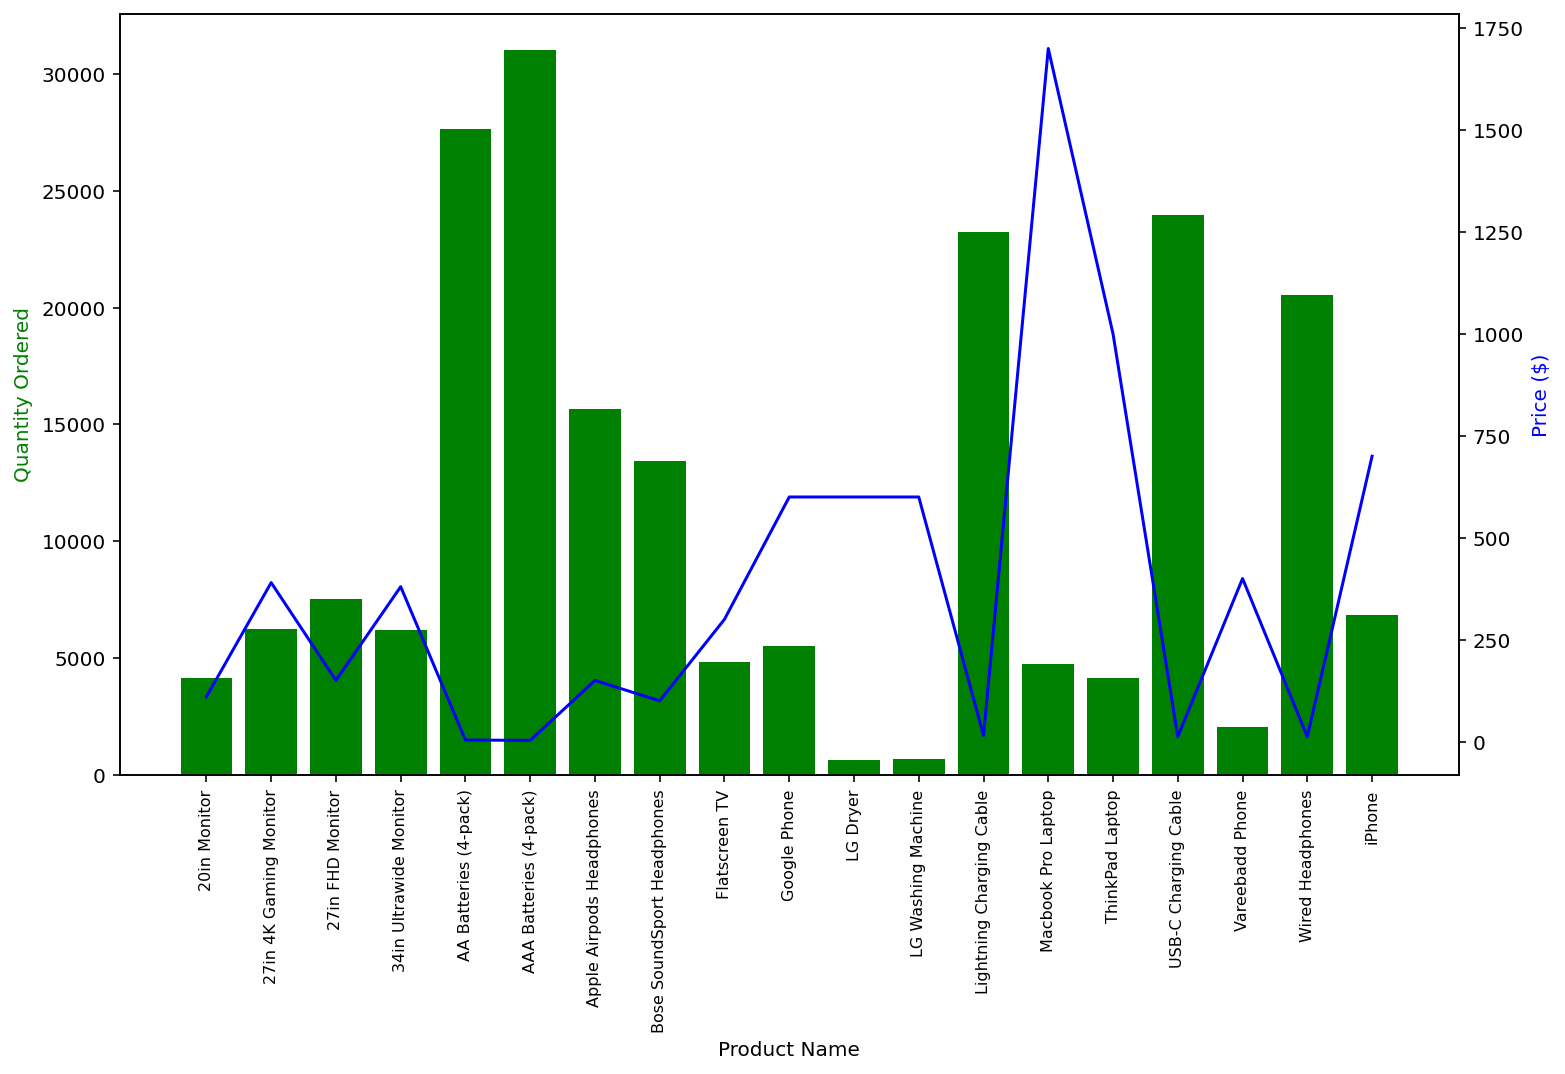

In [106]:
fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color = 'g')
ax2.plot(products,prices,'b-')


ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color = 'g')
ax2.set_ylabel('Price ($)',color = 'b')
ax1.set_xticklabels(products,rotation = 'vertical',size = 8)

plt.show()